4. Business Insight (30 poin)
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.


*   Anisa Agustiana
*   Gideon Kurniawan Sugiarto
*   Yolan Faiz Jamahsyari




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap
import numpy as np

In [3]:
import pandas as pd
from google.colab import files
import io

In [5]:
uploaded = files.upload()

Saving E-Commerce-Dataset.csv to E-Commerce-Dataset.csv


In [9]:
df = pd.read_csv('E-Commerce-Dataset.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## Apakah hubungan status menikah dengan tingkat churn ?

In [10]:
dfa = df.copy()
dfa['MaritalStatus'].value_counts()
dfat = dfa.groupby(['MaritalStatus', 'Churn'])['CustomerID'].nunique()

dfat_pr = dfat.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')

df_1 = dfat_pr.merge(dfat.reset_index(), how = 'inner', on = ['MaritalStatus', 'Churn'])
df_1

<ipython-input-10-5e3a2bab5e13>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfat_pr = dfat.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')


,MaritalStatus,Churn,percentage,CustomerID
0,Divorced,0,85.377358,724
1,Divorced,1,14.622642,124
2,Married,0,88.479571,2642
3,Married,1,11.520429,344
4,Single,0,73.273942,1316
5,Single,1,26.726058,480


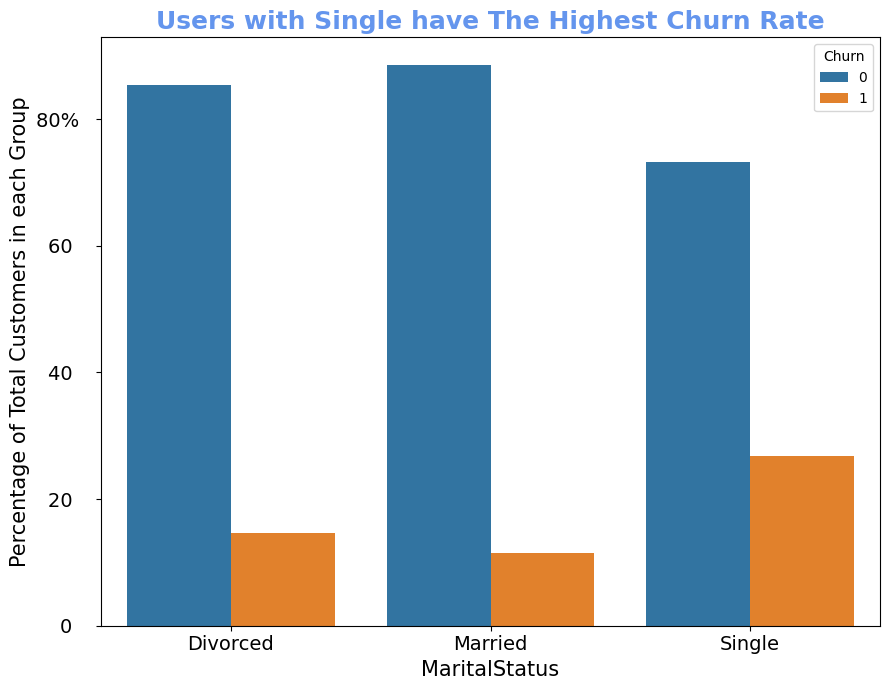

In [11]:
import matplotlib.ticker as mticker
plt.figure(figsize=(9,7))
axt = sns.barplot(x='MaritalStatus', y='percentage', hue='Churn', data=df_1)

plt.title('Users with Single have The Highest Churn Rate',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Customers in each Group', fontsize=15) # y axis label
plt.xlabel('MaritalStatus', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

ticks_loc = axt.get_yticks()
axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()

## Insight:
* Jika dilihat dari visualisasi, tidak ada perbedaan presentase secara signifikan antara status menikah Bercerai (Divorced) dan Menikah (Married) pada jumlah churn. Hanya saja untuk status menikah Belum Menikah (Single) ada perbedaan presentase dengan status lainnya.

Rekomendasi:
* Tindakan Pencegahan: Pada visualisasi menunjukkan adanya pelanggan yang belum menikah (single) memiliki tingkat churn yang tinggi, dari sini mungkin bisa mengambil tindakan pencegahan khusus untuk segmen tersebut. Misalnya, menawarkan penawaran khusus atau layanan yang lebih baik kepada pelanggan yang belum menikah agar tidak churn

## Korelasi Tenure dan Churn rate

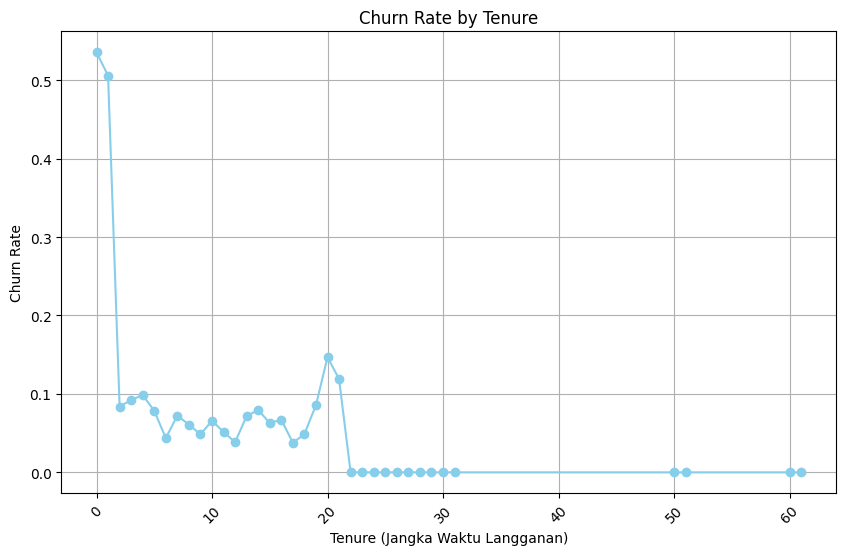

In [21]:
churn_rate_by_tenure = df.groupby('Tenure')['Churn'].mean()

plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='line', marker='o', color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Jangka Waktu Langganan)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Insight dan Rekomendasi
Insight:
* Peningkatan Retensi: Insight menunjukkan bahwa ada tren yang menurun dalam churn rate seiring dengan meningkatnya jangka waktu langganan (Tenure). Pelanggan dengan jangka waktu langganan yang lebih lama cenderung memiliki churn rate yang lebih rendah.

Rekomendasi:
* Fokus pada Pelanggan Baru: Bisnis dapat memperkuat strategi retensi untuk pelanggan baru dengan jangka waktu langganan yang lebih pendek. Ini mungkin melibatkan insentif atau penawaran khusus untuk memotivasi mereka agar tetap menggunakan layanan lebih lama.
Analisis Segmen Pelanggan: Identifikasi segmen pelanggan dengan jangka waktu langganan yang lebih pendek dan coba pahami alasan di balik churn mereka. Dengan pemahaman yang lebih baik, bisnis dapat merancang strategi yang lebih efektif.

## Bussines insight lainnya

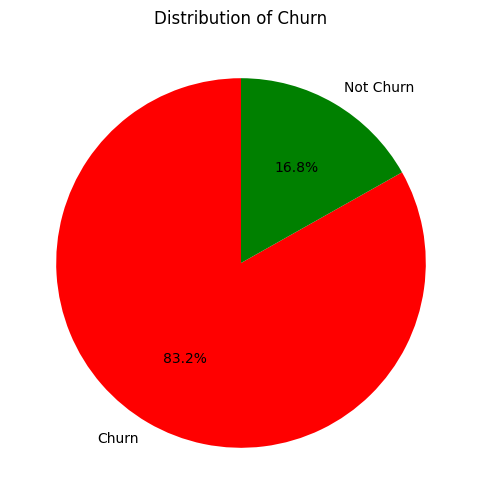

In [18]:
churn_counts = df ['Churn'].value_counts()
labels = ['Churn', 'Not Churn']
colors = ['red', 'green']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.show()


## Insight dan Rekomendasi
Insight:
*   Distribusi Churn: Item daftar Distribusi churn menunjukkan bahwa sebagian pelanggan telah melakukan churn

Rekomendasi:
*  Analisis Penyebab Churn: Identifikasi
penyebab utama churn dengan menganalisis data lebih mendalam. Apakah ada pola atau faktor-faktor tertentu yang menyebabkan pelanggan melakukan churn? Perlu dilakukan analisis penyebab untuk mengambil tindakan yang sesuai.
*  Program Loyalitas dan Insentif: Pertimbangkan untuk memperkenalkan program loyalitas atau insentif yang dapat memotivasi pelanggan untuk tetap menggunakan layanan. Insentif seperti cashback, diskon, atau penawaran eksklusif dapat membantu mempertahankan pelanggan.
*  Fokus pada Retensi: Meskipun sebagian besar pelanggan tetap aktif, bisnis perlu lebih memfokuskan upaya pada retensi pelanggan untuk mengurangi jumlah pelanggan yang melakukan churn.

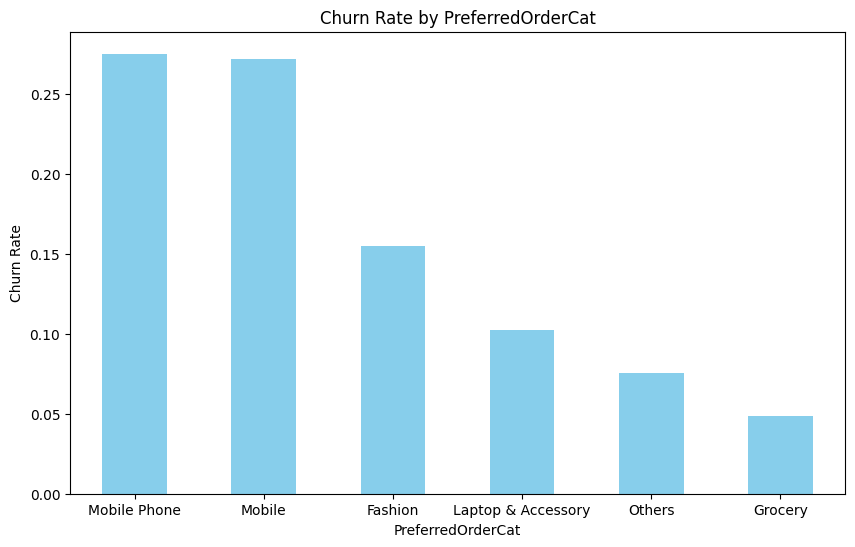

In [19]:
churn_rate_by_category = df.groupby('PreferedOrderCat')['Churn'].mean()

churn_rate_by_category = churn_rate_by_category.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
churn_rate_by_category.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by PreferredOrderCat')
plt.xlabel('PreferredOrderCat')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


## Insight dan Rekomendasi
Insight:
*  Churn Rate Tertinggi: Kategori pesanan "Mobile Phone dan Mobile" memiliki churn rate tertinggi dibandingkan dengan kategori pesanan lainnya. Ini menunjukkan bahwa pelanggan yang memesan produk dalam kategori ini cenderung lebih mungkin untuk melakukan churn.

Rekomendasi:
* Analisis Mendalam: Bisnis perlu melakukan analisis lebih mendalam untuk memahami mengapa kategori pesanan "Mobile Phone dan Mobile" memiliki churn rate yang tinggi. Mungkin ada masalah dalam pengiriman, kualitas produk, atau pengalaman pelanggan yang perlu diidentifikasi.
* Pelacakan dan Umpan Balik Pelanggan: Bisnis dapat mengimplementasikan pelacakan dan umpan balik pelanggan yang aktif untuk kategori "Mobile Phone dan Mobile". Ini akan membantu dalam mengidentifikasi masalah dengan cepat dan mengambil tindakan yang sesuai.
* Promosi dan Diskon: Bisnis dapat mencoba menawarkan promosi khusus atau diskon dalam kategori "Mobile Phone dan Mobile" untuk memotivasi pelanggan agar tetap menggunakan layanan. Promosi ini dapat digunakan sebagai upaya untuk mengurangi churn rate.